## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [42]:
df.Churn.value_counts(dropna=False)

Churn
0    2850
1     483
Name: count, dtype: int64

Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [27]:
# ваш код здесь
df = df.drop(columns=['State'])
df.loc[:, 'International plan'] = df['International plan'].apply(lambda x: 1 if x =='Yes' else 0)
df.loc[:, 'Voice mail plan'] = df['Voice mail plan'].apply(lambda x: 1 if x =='Yes' else 0)
df.loc[:, 'Churn'] = df['Churn'].astype('int', errors='ignore')

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [28]:
# ваш код здесь
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [29]:
# ваш код здесь
X = df.drop(columns=['Churn'])
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [30]:
# ваш код здесь
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [31]:
from sklearn.model_selection import train_test_split

# ваш код здесь
RS = 42
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RS)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [32]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [34]:
# ваш код здесь
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [69]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
lr = LogisticRegression(random_state=RS, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
pred_lr1 = lr.predict_proba(X_test_scaled)

svc = SVC(probability=True, kernel='linear', random_state=RS, class_weight='balanced')
svc.fit(X_train_scaled, y_train)
pred_svc1 = svc.predict_proba(X_test_scaled)

CPU times: total: 2.33 s
Wall time: 1.32 s


С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [70]:
from sklearn.metrics import roc_auc_score

# ваш код здесь
print('lr roc-auc:', roc_auc_score(y_test, pred_lr1[:, 1]))
print('svc roc-auc:', roc_auc_score(y_test, pred_svc1[:, 1]))

lr roc-auc: 0.816729179270014
svc roc-auc: 0.8257874571486186


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [75]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
tree = DecisionTreeClassifier(random_state=RS)
tree.fit(X_train_scaled, y_train)
pred_tree1 = tree.predict_proba(X_test_scaled)

print('tree roc-auc:', roc_auc_score(y_test, pred_tree1[:, 1]))

tree roc-auc: 0.8076426698931236


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [76]:
# ваш код здесь
tree2 = DecisionTreeClassifier(random_state=RS)
tree2.fit(X_train, y_train)
pred_tree2 = tree2.predict_proba(X_test)

print('tree roc-auc:', roc_auc_score(y_test, pred_tree2[:, 1]))

tree roc-auc: 0.8076426698931236


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

In [ ]:
# Ответ:
# Масштабирование признаков не повлияло на результат обучения модели.

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [66]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
# Log Reg --------------------------------------------
lr = LogisticRegression(random_state=RS, class_weight='balanced')
params = {'C': np.arange(0.1, 10.1, 0.5)}
gs = GridSearchCV(lr, params, cv=5, scoring='roc_auc')

gs.fit(X_train_scaled, y_train)

print('LR cv params:', gs.best_params_)
print('LR cv score:', gs.best_score_)

lr = LogisticRegression(C=gs.best_params_['C'], random_state=RS, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
pred_lr2 = lr.predict_proba(X_test_scaled)
print('lr test roc-auc:', roc_auc_score(y_test, pred_lr2[:, 1]))



LR cv params: {'C': 7.6}
LR cv score: 0.8150064581999334
lr test roc-auc: 0.8168663036902601


In [92]:
%%time
# SVC --------------------------------------------
svc = SVC(probability=True, kernel='linear', random_state=RS, class_weight='balanced')
params = {'C': np.arange(0.1, 10.1, 0.5)}
gs = GridSearchCV(svc, params, cv=5, scoring='roc_auc')

gs.fit(X_train_scaled, y_train)

print('SVC cv params:', gs.best_params_)
print('SVC cv score:', gs.best_score_)

svc = SVC(C=gs.best_params_['C'], probability=True, kernel='linear', random_state=RS, class_weight='balanced')
svc.fit(X_train_scaled, y_train)
pred_svc2 = svc.predict_proba(X_test_scaled)
print('SVC test roc-auc:', roc_auc_score(y_test, pred_svc2[:, 1]))


SVC cv params: {'C': 0.1}
SVC cv score: 0.8178195708762688
SVC test roc-auc: 0.8269489816495261
CPU times: total: 3min 16s
Wall time: 3min 16s


In [83]:
%%time
# tree --------------------------------------------
tree = DecisionTreeClassifier(random_state=RS, class_weight='balanced')
params = {'max_depth': range(1, 11), 'criterion': ['gini', 'entropy']}
gs = GridSearchCV(tree, params, cv=5, scoring='roc_auc')

gs.fit(X_train_scaled, y_train)

print('tree cv params:', gs.best_params_)
print('tree cv score:', gs.best_score_)

tree = DecisionTreeClassifier(max_depth=gs.best_params_['max_depth'], 
                              criterion=gs.best_params_['criterion'], 
                              random_state=RS, 
                              class_weight='balanced')
tree.fit(X_train_scaled, y_train)
pred_tree3 = tree.predict_proba(X_test_scaled)
print('tree test roc-auc:', roc_auc_score(y_test, pred_tree3[:, 1]))

tree cv params: {'criterion': 'entropy', 'max_depth': 5}
tree cv score: 0.8815121649602495
tree test roc-auc: 0.8372615446662636
CPU times: total: 1.81 s
Wall time: 1.81 s


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

In [ ]:
# Ответ:
# По roc-auc лучше всего справилась модель решающего дерева
# Я проверял, SVC с ядром по умолчанию лучше )

Нарисуйте roc-кривую для наилучшей модели.

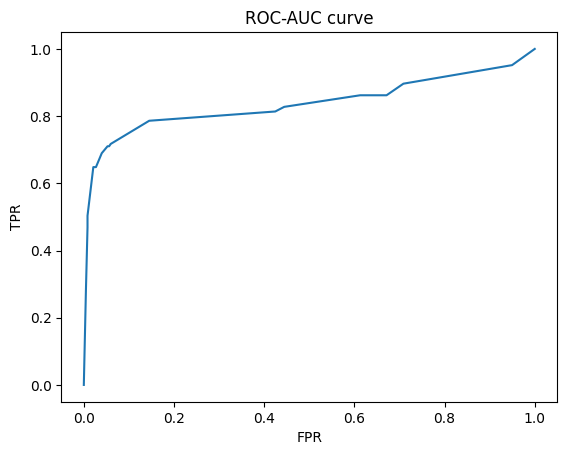

In [93]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь
fpr, tpr, _ = roc_curve(y_test, pred_tree3[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC curve')
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [94]:
# ваш код здесь
diff = roc_auc_score(y_test, pred_tree3[:, 1]) - roc_auc_score(y_test, pred_svc2[:, 1])
print('Difference between two best models:', diff)

Difference between two best models: 0.010312563016737442


In [104]:
tree.feature_names_in_

array(['Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype=object)

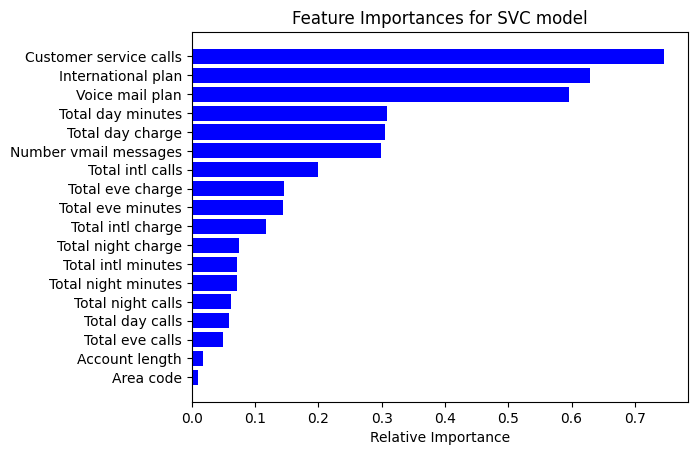

In [115]:
features = svc.feature_names_in_
importances = np.abs(svc.coef_.ravel())
indices = np.argsort(importances)

plt.title('Feature Importances for SVC model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

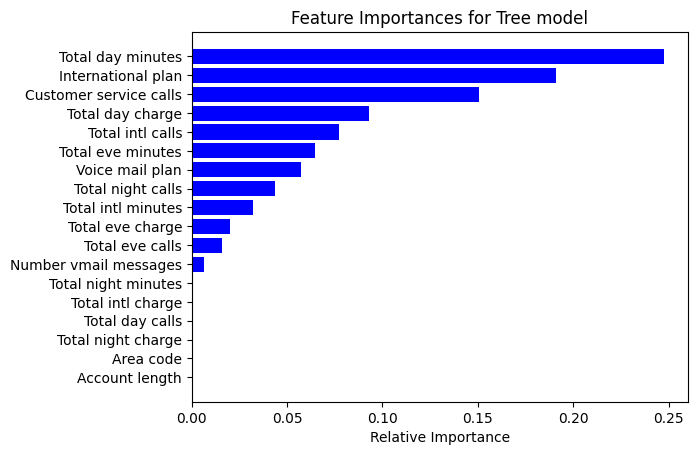

In [116]:
features_tree = tree.feature_names_in_
importances_tree = tree.feature_importances_
indices_tree = np.argsort(importances_tree)

plt.title('Feature Importances for Tree model')
plt.barh(range(len(indices_tree)), importances_tree[indices_tree], color='b', align='center')
plt.yticks(range(len(indices_tree)), [features_tree[i] for i in indices_tree])
plt.xlabel('Relative Importance')
plt.show()

In [122]:
features[indices][-3:]

array(['Voice mail plan', 'International plan', 'Customer service calls'],
      dtype=object)

In [123]:
features_tree[indices_tree][-3:]

array(['Customer service calls', 'International plan',
       'Total day minutes'], dtype=object)

In [ ]:
# Ответ:
# Важность признаков по моделям полностью не совпадает, но 2 признака в топ 3 одинаковые

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

$Ответы:$

1. Данные не сбалансированы. Класс $0$ намного больше класса $1$. При моделировании необходимо достигать балансировки класса
2. После подбора гиперпараметров в данной постановки задачи модель решающего дерева лучше всего решает задачу с точки зрения метрики roc-auc.
3. Для двух лучших моделей самые важные признаки в точности не одинаковы. Но более важные признаки в обеих моделях имеют более выскоий вес. Отличие можно объяснить отличием в логике решения. 